# ImageIO, Matplotlib, Compression

<div class="alert alert-block alert-success">

<b>Outline: </b>
<ul>
    <li>RGB images contain three channels for each color </li>
    <li>Images can be read and saved e.g. with the module <code>imageio</code> using <code>imread()</code> and <code>imsave()</code></li>
    <li><code>Matplotlib</code> provides handy functions to create scientific figures: <code>figure()</code> <code>subplot()</code> <code>imshow()</code> <code>show()</code> </li>
    <li><code>Matplotlib</code> can share axis using <code>sharex() sharey()</code> </li>
    <li>Lossy file compression <code>(.jpg)</code> reduces the filesize of images under loss of information</li>
    <li>Lossless file compression <code>(.tiff, .png)</code> reduces the filesize without the loss of information</li>
    <li>The module <code>os</code> provides functions for file and path manipulation, such as <code>os.makedirs(path_to_folder)</code> (<u>make</u> <u>dir</u>ectories), <code> os.path.join(path1, path2) </code> (joining paths), and <code>os.path.exists</code> (checking if a path exists)</li>
</ul>
</div> 

In [3]:
# import modules for this exercise

import imageio # file reading/writing
import matplotlib.pyplot as plt # plotting
from tqdm import tqdm # progressbar
import numpy as np # projections

# interactive mode of matplotlib
%matplotlib notebook

## Reading images

<div class="alert alert-block alert-info">
    
<b>Theory:</b> 
    
The module <code> imageio </code> provides the function <code>imread(path_to_image)</code> to read in a large amount of fileformats: https://imageio.readthedocs.io/en/v2.4.1/formats.html

</div>

In [4]:
path_to_original_image = 'iekm_picture.jpg'
img = imageio.imread(path_to_original_image)

# Setting up a folder structure

<div class="alert alert-block alert-info">
    
<b>Theory:</b> 
    
The module <code> os </code> provides the functions <code>os.path.join(path1, path2)</code> to join two paths. For example. If one would like to save the file <code>cat.jpg</code> to your Desktop with the path <code>"C:\Users\Kai\Desktop"</code>, one can create a matching path using <code>os.path.join('C:/Users/User/Desktop','cat.png')</code>. This function should be used instead of string manipulations (i.e., calling path = path1 + path2), as it makes cross-platform (windows, linux, mac) easier, and avoids common mistakes (forgetting/using the wr
</div>

In [5]:
import os
output_base_directory = 'compression_test'
output_directory_lossless = os.path.join(output_base_directory, "lossless")
output_directory_lossy = os.path.join(output_base_directory, "lossy")
print(f'Writing images with lossy compression to: {output_directory_lossy}')
print(f'Writing images with lossless compression to: {output_directory_lossless}')

if not os.path.exists(output_directory_lossy):
    print(f"Directory {output_directory_lossy} doesn't exist, creating folder.")
    os.makedirs(output_directory_lossy)

if not os.path.exists(output_directory_lossless):
    print(f"Directory {output_directory_lossless} doesn't exist, creating folder.")
    os.makedirs(output_directory_lossless)

Writing images with lossy compression to: compression_test/lossy
Writing images with lossless compression to: compression_test/lossless


In [6]:
number_of_iterations = 50

img = imageio.imread(path_to_original_image)

for iteration in tqdm(range(number_of_iterations)):
    # starting from the second iteration, read previously saved image
    if iteration > 0:
        img = imageio.imread(output_path_lossy_image)

    # write image to file 
    fileending = 'jpg'
    output_path_lossy_image = os.path.join(output_directory_lossy, f'img_lossy_iteration_{iteration}.{fileending}')
    imageio.imsave(uri=output_path_lossy_image, im=img)

100%|██████████| 50/50 [00:00<00:00, 264.84it/s]


In [7]:
original_image = imageio.imread(path_to_original_image)
lossy_image = imageio.imread(output_path_lossy_image)

<div class="alert alert-block alert-warning">
<b>Task:</b> <br>
Visually inspect the original and saved image using the next cell. Can you spot differences?
</div>

<IPython.core.display.Javascript object>


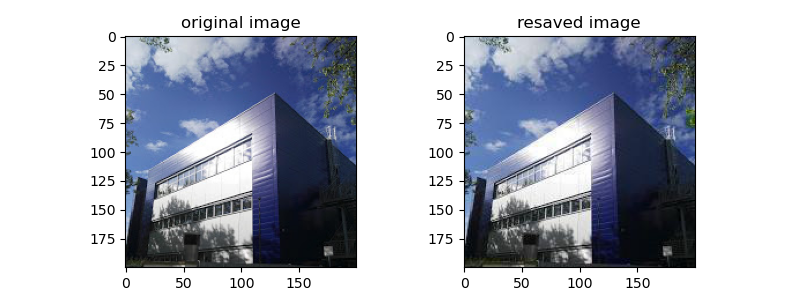

In [8]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(original_image)
plt.title('original image')

plt.subplot(122)
plt.imshow(lossy_image)
plt.title('resaved image')

plt.show()

---
<div class="alert alert-block alert-info">
    
<b>Theory:</b> 
    
The module <code> numpy </code> provides the function <code>np.sum(array, axis)</code> to aggregate/project data across axes.
    
Other operations include:
<ul>
    <li><code>np.mean()</code> (mean/average)</li>
    <li><code>np.std()</code> (standard deviation)</li>
    <li><code>np.var()</code> (variance)</li>
    <li><code>np.min()</code> (minimum)</li>
    <li><code>np.max()</code> (maximum)</li>
    <li><code>np.median()</code> (median)</li>
    <li><code>np.percentile()</code> (percentile)</li>
    <li> <code>np.prod()</code> (product/multiplication)</li>
</ul>

</div>

In [16]:
a=np.uint8(1)
b=np.uint8(5)
print(f'uint8: {a} - {b} = {a-b}')
print(f'int8:  {a.astype(np.int8)} - {b.astype(np.int8)} = {a.astype(np.int8)-b.astype(np.int8)}')
print(f'float: {a.astype(float)} - {b.astype(float)} = {a.astype(float)-b.astype(float)}')

uint8: 1 - 5 = 252
int8:  1 - 5 = -4
float: 1.0 - 5.0 = -4.0


/usr/local/anaconda3/envs/LectureImageProcessing2021/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
difference_image = abs(original_image.astype(float) - lossy_image.astype(float))
print(f'Shape of difference_image before projection: {difference_image.shape}')

difference_image_projected = np.sum(difference_image, axis=2)
print(f'Shape of difference_image after projection: {difference_image_projected.shape}')

In [ ]:
plt.figure(figsize=(8,3))
axes_left = plt.subplot(131)
plt.imshow(original_image)

axes_mid = plt.subplot(132)
axes_mid.sharex(axes_left)
axes_mid.sharey(axes_left)
plt.imshow(lossy_image)

axes_right = plt.subplot(133)
axes_right.sharex(axes_left)
axes_right.sharey(axes_left)
plt.imshow(difference_image_projected)
plt.show()

In [ ]:
number_of_iterations = 100

img = imageio.imread(path_to_original_image)
for iteration in tqdm(range(number_of_iterations)):
    if iteration > 0:
        img = imageio.imread(output_path_image)
    output_path_image = os.path.join(output_directory_lossy, f'img_lossless_iteration_{iteration}.tif')
    imageio.imsave(uri=output_path_image, im=img)

In [ ]:
original_image = imageio.imread(path_to_original_image)
lossless_image = imageio.imread(output_path_image)

difference_image = abs(original_image.astype(float) - lossless_image.astype(float))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(figsize=(8,3))
axes_left = plt.subplot(131)
plt.imshow(original_image)

axes_mid = plt.subplot(132)
axes_mid.sharex(axes_left)
axes_mid.sharey(axes_left)
plt.imshow(lossy_image)

axes_right = plt.subplot(133)
axes_right.sharex(axes_left)
axes_right.sharey(axes_left)
plt.imshow(difference_image)
plt.show()